In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import skew
# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns
%matplotlib inline
import time

In [2]:
df_train = pd.read_csv( "train.csv" )
df_test = pd.read_csv( "test.csv" )

In [3]:
df_train.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05


In [4]:
print(f"train shape : {df_train.shape}")
print(f"test shape : {df_test.shape}")

train shape : (60000, 235)
test shape : (10000, 234)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


## 檢查空值

In [6]:
print("train data:")
df_train.columns[df_train.isnull().any()]

train data:


Index(['parking_area', 'parking_price', 'txn_floor', 'village_income_median'], dtype='object')

In [7]:
print("test data:")
df_test.columns[df_test.isnull().any()]

test data:


Index(['parking_area', 'parking_price', 'txn_floor', 'village_income_median'], dtype='object')

## Drop 

8795     5.777815e+06
37480    1.973377e+09
51731    4.384723e+07
55472    6.063197e+06
Name: total_price, dtype: float64


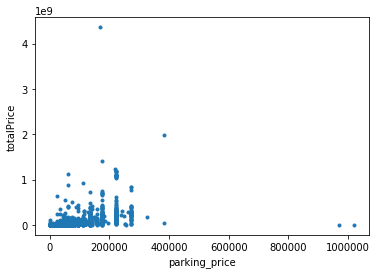

In [8]:
plt.plot(df_train.parking_price, df_train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('totalPrice')
print( df_train[ df_train.parking_price > 350000 ].total_price )

In [9]:
# drop離群值
df_train = df_train.drop( labels = df_train[ df_train.parking_price > 350000 ].index, axis = 0 )

2138     4.357039e+09
32180    5.088279e+09
Name: total_price, dtype: float64


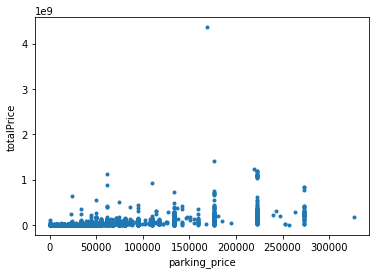

In [10]:
plt.plot(df_train.parking_price, df_train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('totalPrice')
print( df_train[ df_train.total_price > 4000000000 ].total_price )

In [11]:
# drop掉離群值
df_train = df_train.drop( labels = df_train[ df_train.total_price > 4000000000 ].index, axis = 0 )

Text(0, 0.5, 'totalPrice')

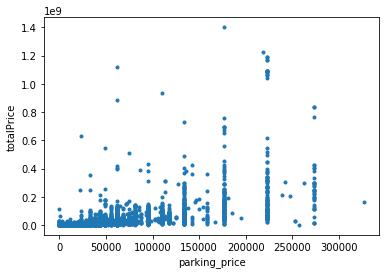

In [12]:
plt.plot(df_train.parking_price, df_train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('totalPrice')

## parking price 補值

In [14]:
# parking_way 為 2的補 0
lst = df_train.loc[df_train['parking_way'] == 2].index
for i in lst:
    df_train.loc[i, 'parking_price'] = 0

In [15]:
df_train.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05


In [16]:
# parking_way 為 2的補 0
lst = df_test.loc[df_test['parking_way'] == 2].index
for i in lst:
    df_test.loc[i, 'parking_price'] = 0

In [17]:
df_test.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,NaN,...,7,21,1,129,1,3991,1,8409,1,105.462231
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,NaN,...,18,44,1,67,1,1950,1,10725,1,100.819809
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,NaN,...,0,3,1,35,1,3707,1,19459,1,259.800543
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,NaN,...,16,60,1,144,1,6487,1,29400,1,22.941906
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,NaN,...,4,18,1,76,1,1346,1,3280,1,181.213095


## 合併

In [18]:
df_train_price = df_train['total_price']
df_test_id = df_test['building_id']

df_all = pd.concat( [ df_train.drop( [ 'building_id', 'total_price' ], axis = 1 ),
                      df_test.drop( [ 'building_id' ], axis = 1 ) ],
                      axis = 0, ignore_index = False )
df_all.shape

(69994, 233)

### village_income_median

In [19]:
mm = np.median(df_all['village_income_median'].dropna())
mid = np.mean(df_all['village_income_median'])
print("mean = {}, median = {}".format(mid, mm))
df_all['village_income_median'] = df_all['village_income_median'].fillna(mid)

mean = 674.6175365526883, median = 642.0


## txn_floor補值

In [22]:
# txn_floor 補 0 視為透天 toprice area
cols = ['txn_floor']
for col in cols:
    df_all[col] = df_all[col].fillna(0)

In [23]:
print("data:")
df_all.columns[df_all.isnull().any()]

data:


Index(['parking_area'], dtype='object')

## drop

In [24]:
#drop parking_area 'parking_price', 
df_all = df_all.drop(['parking_area', 'I_10', 'II_10', 'III_10', 'IV_10', 'V_10', 'VI_10', 'VII_10', 'VIII_10', 'IX_10', 'X_10', 'XI_10', 'XII_10', 'XIII_10', 'XIV_10'], axis = 1)
print( df_all.shape )

(69994, 218)


In [25]:
df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='index')))]
#df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_MIN')))]
# df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='N_')))]
# df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_10')))]
print( df_all.shape )

(69994, 148)


## 合併後 Do log

In [26]:
df_train.total_price.head()

0    6.476038e+05
1    3.321452e+06
2    9.570885e+06
3    1.421501e+07
4    7.627120e+05
Name: total_price, dtype: float64

In [27]:
# handle skewness
df_train.total_price = np.log1p( df_train.total_price )

num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
skewed_feats = df_train[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
# print(skewed_feats)
print("---------------------------------------------")
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )

---------------------------------------------


In [28]:
df_train.total_price.head()

0    13.381036
1    15.015913
2    16.074236
3    16.469809
4    13.544637
Name: total_price, dtype: float64

In [29]:
print(df_all.shape)

(69994, 148)


## 分離train test

In [38]:
X_train = df_all[:59994]
y_trainn = df_train_price
X_test = df_all[59994:]

In [39]:
print("X_train: ")
print(X_train.shape)
print("--------------")
print("X_test: ")
print(X_test.shape)

X_train: 
(59994, 148)
--------------
X_test: 
(10000, 148)


In [47]:
median_trip_duration = np.median(df_train_price.values)

In [48]:
# !pip install lightgbm

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [57]:
print('Training and making predictions')
params = {
    'boosting_type': 'dart',  ####### dart(運氣)  gbdt
    'objective': 'regression',
    #'metric': 'rmse',         ####### rmsle 
    'max_depth': 30,
#     'num_leaves': 10000,
    'learning_rate': 0.23,
    'subsample_for_bin': 200000,
    'verbose': 0,
    'eval_metric':'rmsle'
#     'early_stopping_round': 5000
    }
n_estimators = 200000

n_iters = 11

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

def score(preds, y_valid):
    assert len(y_valid) == len(preds)
    Z = []
    rate = abs((preds - y_valid) / y_valid)
    for hit in rate:
        if hit <= 0.1:
            Z.append(1)
        else:
            Z.append(0)

    Hit_Rate = np.mean(Z)
    MAPE = np.sum(rate)/len(rate)
    tmp = lambda x: 1 if x >= 1 else x
    score = str(round(Hit_Rate, 4)*10000 + (1 - tmp(MAPE)))
    return score

Training and making predictions


In [58]:
preds_buf = []
err_buf = []

start_time = time.time()

for i in range(n_iters): 
    print('Round {} start'.format(i+1))
    x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_trainn, test_size=0.20) #, random_state=i
    d_train = lgb.Dataset(x_train, label=y_train)
    d_valid = lgb.Dataset(x_valid, label=y_valid)
    watchlist = [d_valid]

    model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1000)

    preds = model.predict(x_valid)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    err = rmsle(np.exp(y_valid), preds)
    err_buf.append(err)
    print('RMSLE = ' + str(err))
    print('score: ' + score(preds, np.exp(y_valid)))
    
    preds = model.predict(X_test)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    preds_buf.append(preds)
#     print('total time: ' + str((time.time() - start_time) / 60) + ' min')
    print('')

print('Mean RMSLE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
# Average predictions
preds = np.median(preds_buf, axis=0)

print('total time: ' + str((time.time() - start_time) / 60) + ' min')

Round 1 start
[1000]	valid_0's l2: 0.0430322
[2000]	valid_0's l2: 0.0391988
[3000]	valid_0's l2: 0.0377552
[4000]	valid_0's l2: 0.0371954
[5000]	valid_0's l2: 0.0368456
[6000]	valid_0's l2: 0.0367431
[7000]	valid_0's l2: 0.0364406
[8000]	valid_0's l2: 0.036292
[9000]	valid_0's l2: 0.0361674
[10000]	valid_0's l2: 0.0361397
[11000]	valid_0's l2: 0.0361433
[12000]	valid_0's l2: 0.0361134
[13000]	valid_0's l2: 0.0360654
[14000]	valid_0's l2: 0.0360382
[15000]	valid_0's l2: 0.0360609
[16000]	valid_0's l2: 0.0360416
[17000]	valid_0's l2: 0.0359795
[18000]	valid_0's l2: 0.0359649
[19000]	valid_0's l2: 0.0359403
[20000]	valid_0's l2: 0.0359494
[21000]	valid_0's l2: 0.0359123
[22000]	valid_0's l2: 0.03593
[23000]	valid_0's l2: 0.0358853
[24000]	valid_0's l2: 0.035851
[25000]	valid_0's l2: 0.0358614
[26000]	valid_0's l2: 0.0358514
[27000]	valid_0's l2: 0.0358342
[28000]	valid_0's l2: 0.0358277
[29000]	valid_0's l2: 0.0358067
[30000]	valid_0's l2: 0.0357734
[31000]	valid_0's l2: 0.0357764
[32000]

[54000]	valid_0's l2: 0.0376565
[55000]	valid_0's l2: 0.0376436
[56000]	valid_0's l2: 0.0376286
[57000]	valid_0's l2: 0.0376331
[58000]	valid_0's l2: 0.0376237
[59000]	valid_0's l2: 0.0376303
[60000]	valid_0's l2: 0.0376392
[61000]	valid_0's l2: 0.0376592
[62000]	valid_0's l2: 0.0376714
[63000]	valid_0's l2: 0.037665
[64000]	valid_0's l2: 0.0376597
[65000]	valid_0's l2: 0.0376715
[66000]	valid_0's l2: 0.0376618
[67000]	valid_0's l2: 0.0376623
[68000]	valid_0's l2: 0.0376458
[69000]	valid_0's l2: 0.0376402
[70000]	valid_0's l2: 0.0376523
[71000]	valid_0's l2: 0.0376503
[72000]	valid_0's l2: 0.0376457
[73000]	valid_0's l2: 0.0376505
[74000]	valid_0's l2: 0.0376543
[75000]	valid_0's l2: 0.0376634
[76000]	valid_0's l2: 0.0376665
[77000]	valid_0's l2: 0.0376603
[78000]	valid_0's l2: 0.037658
[79000]	valid_0's l2: 0.037665
[80000]	valid_0's l2: 0.0376616
[81000]	valid_0's l2: 0.0376742
[82000]	valid_0's l2: 0.0376714
[83000]	valid_0's l2: 0.0376734
[84000]	valid_0's l2: 0.0376685
[85000]	val

[106000]	valid_0's l2: 0.0360538
[107000]	valid_0's l2: 0.0360519
[108000]	valid_0's l2: 0.036047
[109000]	valid_0's l2: 0.0360534
[110000]	valid_0's l2: 0.0360486
[111000]	valid_0's l2: 0.0360438
[112000]	valid_0's l2: 0.0360442
[113000]	valid_0's l2: 0.0360444
[114000]	valid_0's l2: 0.036048
[115000]	valid_0's l2: 0.0360494
[116000]	valid_0's l2: 0.0360445
[117000]	valid_0's l2: 0.0360416
[118000]	valid_0's l2: 0.0360366
[119000]	valid_0's l2: 0.0360339
[120000]	valid_0's l2: 0.0360311
[121000]	valid_0's l2: 0.0360237
[122000]	valid_0's l2: 0.0360202
[123000]	valid_0's l2: 0.0360248
[124000]	valid_0's l2: 0.0360254
[125000]	valid_0's l2: 0.0360282
[126000]	valid_0's l2: 0.036029
[127000]	valid_0's l2: 0.0360258
[128000]	valid_0's l2: 0.036025
[129000]	valid_0's l2: 0.0360259
[130000]	valid_0's l2: 0.0360276
[131000]	valid_0's l2: 0.0360275
[132000]	valid_0's l2: 0.0360277
[133000]	valid_0's l2: 0.0360234
[134000]	valid_0's l2: 0.0360227
[135000]	valid_0's l2: 0.0360234
[136000]	valid

[157000]	valid_0's l2: 0.0354676
[158000]	valid_0's l2: 0.0354646
[159000]	valid_0's l2: 0.0354655
[160000]	valid_0's l2: 0.0354673
[161000]	valid_0's l2: 0.0354671
[162000]	valid_0's l2: 0.0354729
[163000]	valid_0's l2: 0.0354737
[164000]	valid_0's l2: 0.0354783
[165000]	valid_0's l2: 0.035477
[166000]	valid_0's l2: 0.035473
[167000]	valid_0's l2: 0.0354673
[168000]	valid_0's l2: 0.0354646
[169000]	valid_0's l2: 0.0354616
[170000]	valid_0's l2: 0.0354592
[171000]	valid_0's l2: 0.0354553
[172000]	valid_0's l2: 0.0354565
[173000]	valid_0's l2: 0.0354507
[174000]	valid_0's l2: 0.0354531
[175000]	valid_0's l2: 0.0354514
[176000]	valid_0's l2: 0.0354484
[177000]	valid_0's l2: 0.0354483
[178000]	valid_0's l2: 0.0354462
[179000]	valid_0's l2: 0.0354483
[180000]	valid_0's l2: 0.0354467
[181000]	valid_0's l2: 0.0354446
[182000]	valid_0's l2: 0.0354416
[183000]	valid_0's l2: 0.0354387
[184000]	valid_0's l2: 0.0354408
[185000]	valid_0's l2: 0.0354388
[186000]	valid_0's l2: 0.035439
[187000]	vali

[6000]	valid_0's l2: 0.0356897
[7000]	valid_0's l2: 0.0353026
[8000]	valid_0's l2: 0.035209
[9000]	valid_0's l2: 0.035061
[10000]	valid_0's l2: 0.0349508
[11000]	valid_0's l2: 0.0349025
[12000]	valid_0's l2: 0.0348135
[13000]	valid_0's l2: 0.0347122
[14000]	valid_0's l2: 0.034688
[15000]	valid_0's l2: 0.0346509
[16000]	valid_0's l2: 0.0346069
[17000]	valid_0's l2: 0.0345841
[18000]	valid_0's l2: 0.0345531
[19000]	valid_0's l2: 0.0344819
[20000]	valid_0's l2: 0.0344661
[21000]	valid_0's l2: 0.0344496
[22000]	valid_0's l2: 0.034406
[23000]	valid_0's l2: 0.0343784
[24000]	valid_0's l2: 0.0343349
[25000]	valid_0's l2: 0.0343159
[26000]	valid_0's l2: 0.0343047
[27000]	valid_0's l2: 0.0342788
[28000]	valid_0's l2: 0.0342871
[29000]	valid_0's l2: 0.0342711
[30000]	valid_0's l2: 0.034241
[31000]	valid_0's l2: 0.0342388
[32000]	valid_0's l2: 0.034225
[33000]	valid_0's l2: 0.0342191
[34000]	valid_0's l2: 0.0342004
[35000]	valid_0's l2: 0.0341671
[36000]	valid_0's l2: 0.0341826
[37000]	valid_0's 

[59000]	valid_0's l2: 0.0356289
[60000]	valid_0's l2: 0.0356404
[61000]	valid_0's l2: 0.0356268
[62000]	valid_0's l2: 0.035617
[63000]	valid_0's l2: 0.0356173
[64000]	valid_0's l2: 0.0356153
[65000]	valid_0's l2: 0.0356057
[66000]	valid_0's l2: 0.0356119
[67000]	valid_0's l2: 0.0356148
[68000]	valid_0's l2: 0.0356147
[69000]	valid_0's l2: 0.0356071
[70000]	valid_0's l2: 0.0355849
[71000]	valid_0's l2: 0.0355635
[72000]	valid_0's l2: 0.0355492
[73000]	valid_0's l2: 0.0355574
[74000]	valid_0's l2: 0.0355584
[75000]	valid_0's l2: 0.035566
[76000]	valid_0's l2: 0.0355612
[77000]	valid_0's l2: 0.0355615
[78000]	valid_0's l2: 0.0355668
[79000]	valid_0's l2: 0.0355671
[80000]	valid_0's l2: 0.0355664
[81000]	valid_0's l2: 0.0355656
[82000]	valid_0's l2: 0.035556
[83000]	valid_0's l2: 0.0355522
[84000]	valid_0's l2: 0.0355598
[85000]	valid_0's l2: 0.0355611
[86000]	valid_0's l2: 0.0355665
[87000]	valid_0's l2: 0.0355721
[88000]	valid_0's l2: 0.035569
[89000]	valid_0's l2: 0.035568
[90000]	valid

[111000]	valid_0's l2: 0.03571
[112000]	valid_0's l2: 0.0357066
[113000]	valid_0's l2: 0.0357036
[114000]	valid_0's l2: 0.0357058
[115000]	valid_0's l2: 0.0357041
[116000]	valid_0's l2: 0.0356994
[117000]	valid_0's l2: 0.0357009
[118000]	valid_0's l2: 0.035704
[119000]	valid_0's l2: 0.0357104
[120000]	valid_0's l2: 0.0357128
[121000]	valid_0's l2: 0.0357149
[122000]	valid_0's l2: 0.0357198
[123000]	valid_0's l2: 0.0357181
[124000]	valid_0's l2: 0.0357209
[125000]	valid_0's l2: 0.0357242
[126000]	valid_0's l2: 0.0357226
[127000]	valid_0's l2: 0.0357217
[128000]	valid_0's l2: 0.0357206
[129000]	valid_0's l2: 0.0357197
[130000]	valid_0's l2: 0.035726
[131000]	valid_0's l2: 0.0357228
[132000]	valid_0's l2: 0.0357213
[133000]	valid_0's l2: 0.0357219
[134000]	valid_0's l2: 0.0357268
[135000]	valid_0's l2: 0.0357263
[136000]	valid_0's l2: 0.0357295
[137000]	valid_0's l2: 0.0357359
[138000]	valid_0's l2: 0.0357354
[139000]	valid_0's l2: 0.0357381
[140000]	valid_0's l2: 0.0357444
[141000]	valid

[162000]	valid_0's l2: 0.0367589
[163000]	valid_0's l2: 0.0367579
[164000]	valid_0's l2: 0.0367573
[165000]	valid_0's l2: 0.0367612
[166000]	valid_0's l2: 0.036765
[167000]	valid_0's l2: 0.0367711
[168000]	valid_0's l2: 0.0367689
[169000]	valid_0's l2: 0.0367672
[170000]	valid_0's l2: 0.0367668
[171000]	valid_0's l2: 0.036766
[172000]	valid_0's l2: 0.0367646
[173000]	valid_0's l2: 0.0367676
[174000]	valid_0's l2: 0.0367668
[175000]	valid_0's l2: 0.0367664
[176000]	valid_0's l2: 0.0367677
[177000]	valid_0's l2: 0.0367675
[178000]	valid_0's l2: 0.0367688
[179000]	valid_0's l2: 0.0367654
[180000]	valid_0's l2: 0.0367651
[181000]	valid_0's l2: 0.0367644
[182000]	valid_0's l2: 0.0367674
[183000]	valid_0's l2: 0.0367666
[184000]	valid_0's l2: 0.0367661
[185000]	valid_0's l2: 0.0367665
[186000]	valid_0's l2: 0.0367697
[187000]	valid_0's l2: 0.0367707
[188000]	valid_0's l2: 0.0367734
[189000]	valid_0's l2: 0.036779
[190000]	valid_0's l2: 0.036776
[191000]	valid_0's l2: 0.0367678
[192000]	valid

[11000]	valid_0's l2: 0.0393727
[12000]	valid_0's l2: 0.0393136
[13000]	valid_0's l2: 0.0392799
[14000]	valid_0's l2: 0.0391982
[15000]	valid_0's l2: 0.0392445
[16000]	valid_0's l2: 0.0392281
[17000]	valid_0's l2: 0.0392125
[18000]	valid_0's l2: 0.0392052
[19000]	valid_0's l2: 0.0391975
[20000]	valid_0's l2: 0.0391668
[21000]	valid_0's l2: 0.0391822
[22000]	valid_0's l2: 0.0391265
[23000]	valid_0's l2: 0.0390934
[24000]	valid_0's l2: 0.0390496
[25000]	valid_0's l2: 0.0390344
[26000]	valid_0's l2: 0.0389808
[27000]	valid_0's l2: 0.0389613
[28000]	valid_0's l2: 0.0389597
[29000]	valid_0's l2: 0.0389399
[30000]	valid_0's l2: 0.0389175
[31000]	valid_0's l2: 0.0388969
[32000]	valid_0's l2: 0.0388935
[33000]	valid_0's l2: 0.0388878
[34000]	valid_0's l2: 0.0388935
[35000]	valid_0's l2: 0.0388997
[36000]	valid_0's l2: 0.0388966
[37000]	valid_0's l2: 0.0388823
[38000]	valid_0's l2: 0.038861
[39000]	valid_0's l2: 0.0388499
[40000]	valid_0's l2: 0.0388018
[41000]	valid_0's l2: 0.0387905
[42000]	v

In [59]:
sub = pd.DataFrame()
sub['building_id'] = df_test_id
sub['total_price'] = preds
sub.to_csv('BGM_submission_dart_0.23_deep_30_estimators_20W_niters_11_rmsle_().csv',index=False) 